In [2]:
import numpy as np

k = 2
def convert_to_SS(a, b0):

    A = np.zeros((k,k))
    A[0: (k - 1), 1:k] = np.eye(k - 1) # 1..n-1 rows and 2..k columns are identity matrix
    A[k - 1, 0:] = -a #last row is a multiplied by -1, because of right hand side

    B = np.zeros(k)
    B[k - 1] = b0
    return A, B

    
a = [-3,2,1] # k + 1, because indexes are from 0 to k
b0 = np.random.rand(1)
print("ODE with following random coefficients:", a, end = '')
print("and b0:",b0)


b0 = b0/a[k]
a = a[:k] / a[k] # a0 to ak-1 divided to a_k 


A,B = convert_to_SS(a,b0)

print("matrix A:", A)
print("matrix B:", B)


ODE with following random coefficients: [0.18782134 0.9956439  0.34959569 0.27135484 0.58021477 0.83244806]and b0: [0.77413732]
matrix A: [[ 0.          1.          0.          0.          0.        ]
 [ 0.          0.          1.          0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          1.        ]
 [-0.22562529 -1.19604327 -0.41996097 -0.3259721  -0.69699816]]
matrix B: [0.        0.        0.        0.        0.9299527]


Text(0, 0.5, 'x')

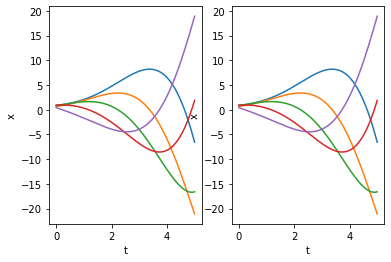

In [27]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def solveODE(x, t):
    dx = np.zeros(k)
    dx[0:(k-1)] = x[1:k]    
    dx[k-1] = -a.dot(x)
    return dx

def solveSS(x, t):
    return A.dot(x)

t = np.linspace(0, 5, 5000)
x0 = np.random.rand(k)  

sol1 = odeint(solveODE, x0, t)
sol2 = odeint(solveSS, x0, t)


plt.subplot(1,2,1)
plt.plot(t, sol1)
plt.xlabel('t')
plt.ylabel('x')


plt.subplot(1,2,2)
plt.plot(t, sol1)
plt.xlabel('t')
plt.ylabel('x')